In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import random
import time
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [67]:
np.random.seed(1234)
X, Y = make_moons(1000, noise = 0.1)

# Split into test and training data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=73)
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

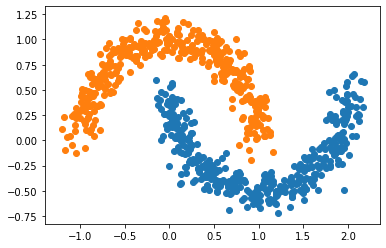

In [68]:
import matplotlib.pyplot as plt
plt.scatter(*x_train[y_train.flatten() == 1, :].T)
plt.scatter(*x_train[y_train.flatten() == 0, :].T)
plt.show()

In [69]:
np.shape(x_train), np.shape(y_train)

((750, 2), (750, 1))

In [70]:
# Standard BP
model_bp = keras.Sequential(
    [
        keras.Input(shape=(2,)),
        layers.Dense(100, activation = "sigmoid"),
        #layers.Dense(50, activation = "sigmoid"),
        layers.Dense(1, activation = "sigmoid")
    ]
)
model_bp.summary()
#model_bp.get_weights()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [71]:
import time
batch_size = 64
epochs = 1000
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

st = time.time()
model_bp.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model_bp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
print(time.time() - st)

Epoch 1/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6467
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.7373
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.7773
Epoch 4/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6112 - accuracy: 0.7613
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.7920
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.8173
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7933
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.8080
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.8107
Epoch 10/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.8053

12/12 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.8827
Epoch 163/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2459 - accuracy: 0.8840
Epoch 164/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8813
Epoch 165/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8867
Epoch 166/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8800
Epoch 167/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.8880
Epoch 168/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8773
Epoch 169/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.8893
Epoch 170/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8827
Epoch 171/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.8867
Epoch 323/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.8773
Epoch 324/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.8840
Epoch 325/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.2441 - accuracy: 0.8827
Epoch 326/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.8787
Epoch 327/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.8853
Epoch 328/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.8880
Epoch 329/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.8853
Epoch 330/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.8827
Epoch 331/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.

12/12 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.8827
Epoch 483/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8800
Epoch 484/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.8880
Epoch 485/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.8787
Epoch 486/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.8840
Epoch 487/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2453 - accuracy: 0.8813
Epoch 488/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8853
Epoch 489/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.8840
Epoch 490/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.8880
Epoch 491/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.2458 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.8880
Epoch 643/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8787
Epoch 644/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.8853
Epoch 645/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.8893
Epoch 646/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8813
Epoch 647/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.8853
Epoch 648/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.8880
Epoch 649/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.8907
Epoch 650/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.8800
Epoch 651/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.8853
Epoch 803/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.8827
Epoch 804/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.8853
Epoch 805/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.8853
Epoch 806/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.8800
Epoch 807/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.8840
Epoch 808/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.8840
Epoch 809/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.8827
Epoch 810/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8827
Epoch 811/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.8787
Epoch 963/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.8840
Epoch 964/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.8773
Epoch 965/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.8893
Epoch 966/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8800
Epoch 967/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.8813
Epoch 968/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.8853
Epoch 969/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.8853
Epoch 970/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.8840
Epoch 971/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.

In [7]:
#hmc

def convert2_zero_one(x):
    
    t = [tf.math.sigmoid(i) for i in x]
    
    return t

In [8]:
def rerange(x, r = 6.0):
    
    out_of_range = tf.cast(tf.math.greater(tf.math.abs(x), r), tf.float32)
    sign = tf.math.sign(x)
    
    return x * (1 - out_of_range) + sign * r * out_of_range

In [9]:
# MLP model
class StochasticMLP(Model):
    
    def __init__(self, hidden_layer_sizes=[100], n_outputs=10):
        super(StochasticMLP, self).__init__()
        self.hidden_layer_sizes = hidden_layer_sizes
        self.fc_layers = [Dense(layer_size) for layer_size in hidden_layer_sizes]
        self.output_layer = Dense(n_outputs)
    
    def call(self, x):
        
        #x = Flatten()(x)
        
        network = []
        
        for i, layer in enumerate(self.fc_layers):
            
            logits = layer(x)
            x = tfp.distributions.Bernoulli(logits=logits).sample()
            network.append(x)

        final_logits = self.output_layer(x) # initial the weight of output layer
            
        return network
    
    def target_log_prob(self, x, h, y):
        
        h_current = convert2_zero_one([tf.cast(h_i, dtype=tf.float32) for h_i in h])
        h_previous = [x] + h_current[:-1]
    
        nlog_prob = 0. # negative log probability
        
        for i, (cv, pv, layer) in enumerate(
            zip(h_current, h_previous, self.fc_layers)):
            
            ce = tf.nn.sigmoid_cross_entropy_with_logits(
                labels=cv, logits=layer(pv))
            
            nlog_prob += tf.reduce_sum(ce, axis = -1)
        
        fce = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=tf.cast(y, tf.float32), logits=self.output_layer(h_current[-1]))
        nlog_prob += tf.reduce_sum(fce, axis = -1)
            
        return -1 * nlog_prob

    def target_log_prob2(self, x, h, y):

        h_current = convert2_zero_one(tf.split(h, self.hidden_layer_sizes, axis = 1))
        h_previous = [x] + h_current[:-1]
        
        nlog_prob = 0.
        
        for i, (cv, pv, layer) in enumerate(
            zip(h_current, h_previous, self.fc_layers)):
            
            ce = tf.nn.sigmoid_cross_entropy_with_logits(
                labels=cv, logits=layer(pv))
            
            nlog_prob += tf.reduce_sum(ce, axis = -1)
        
        fce = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=tf.cast(y, tf.float32), logits=self.output_layer(h_current[-1]))
        nlog_prob += tf.reduce_sum(fce, axis = -1)
            
        return -1 * nlog_prob
    
    def generate_hmc_kernel(self, x, y, step_size = pow(1000, -1/4)):
        
        adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(tfp.mcmc.HamiltonianMonteCarlo(
            target_log_prob_fn = lambda v: self.target_log_prob2(x, v, y),
            num_leapfrog_steps = 2,
            step_size = step_size),
            num_adaptation_steps=int(100 * 0.8))
        
        return adaptive_hmc
    
    # new proposing-state method with HamiltonianMonteCarlo
    def propose_new_state_hamiltonian(self, x, h, y, hmc_kernel):
    
        h_current = h
        h_current = [tf.cast(h_i, dtype=tf.float32) for h_i in h_current]
        h_current = tf.concatenate(h_current)

        # run the chain (with burn-in)
        num_results = 1
        num_burnin_steps = 0

        samples = tfp.mcmc.sample_chain(
            num_results = num_results,
            num_burnin_steps = num_burnin_steps,
            current_state = h_current, # may need to be reshaped
            kernel = hmc_kernel,
            trace_fn = None)

        new_step_size = samples[2][4].numpy()
        
        h_state = rerange(samples[0][0])
        h_new = tf.split(h_state, [100], axis = 1)   

        return(h_new, new_step_size)
    
    def update_weights(self, x, h, y, lr = 0.1):
        
        optimizer = tf.keras.optimizers.SGD(learning_rate = lr)
        with tf.GradientTape() as tape:
            loss = -1 * tf.reduce_mean(self.target_log_prob(x, h, y))
        
        grads = tape.gradient(loss, self.trainable_weights)
        optimizer.apply_gradients(zip(grads, self.trainable_weights))

    def get_predictions(self, x):

        logits = 0.0
        for layer in self.fc_layers:
            logits = layer(x)
            x = tf.math.sigmoid(logits)
        
        logits = self.output_layer(x)
        probs = tf.math.sigmoid(logits)
        #print(probs)
        labels = tf.cast(tf.math.greater(probs, 0.5), tf.int32)

        return labels

In [72]:
model = StochasticMLP(hidden_layer_sizes = [100], n_outputs=1)

In [73]:
network = [model.call(images) for images, labels in train_ds]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [74]:
kernels = [model.generate_hmc_kernel(images, labels) for images, labels in train_ds]

In [75]:
burnin = 500
step_sizes = []
for i in range(burnin):
    
    if(i % 100 == 0):
        print("Step %d" % i)
    network_new = []
    kernels_new = []
    
    for (images, labels), net, hmc_kernel in zip(train_ds, network, kernels):
        net_current = net
        net_current = [tf.cast(net_i, dtype=tf.float32) for net_i in net_current]
        net_current = tf.concat(net_current, axis = 1)
        
        num_results = 1
        num_burnin_steps = 0

        samples = tfp.mcmc.sample_chain(
            num_results = num_results,
            num_burnin_steps = num_burnin_steps,
            current_state = net_current, # may need to be reshaped
            kernel = hmc_kernel,
            #trace_fn = lambda _, pkr: pkr.inner_results.accepted_results.new_step_size,
            trace_fn = None,
            return_final_kernel_results = True)
        
        #print(samples[2].new_step_size.numpy())
        new_step_size = samples[2][4].numpy()
        step_sizes.append(new_step_size)
        
        new_state = rerange(samples[0][0])
        net_new = tf.split(new_state, [100], axis = 1)   
        network_new.append(net_new)
        
        # build new kernel
        ker_new = model.generate_hmc_kernel(images, labels, new_step_size)
        kernels_new.append(ker_new)
            
    network = network_new
    kernels = kernels_new
    
    #print(network[0])

Step 0
Step 100
Step 200
Step 300
Step 400


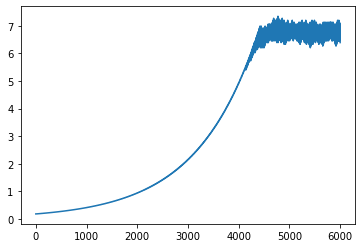

In [76]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(step_sizes)), step_sizes)
plt.show()
pass

In [77]:
epochs = 1000

start_time = time.time()
for epoch in range(epochs):
    
    loss = 0.0
    acc = 0.0
    for bs, (x, y) in enumerate(train_ds):
        
        # only one mini-batch
        model.update_weights(x, network[bs], y, 0.1)
        
        network_new = []

        for (xx, yy), net, hmc_kernel in zip(train_ds, network, kernels):
            net_current = net
            net_current = [tf.cast(net_i, dtype=tf.float32) for net_i in net_current]
            net_current = tf.concat(net_current, axis = 1)
        
            num_results = 1
            num_burnin_steps = 0

            samples = tfp.mcmc.sample_chain(
                num_results = num_results,
                num_burnin_steps = num_burnin_steps,
                current_state = net_current, # may need to be reshaped
                kernel = hmc_kernel,
                trace_fn = None,
                return_final_kernel_results = True)
            
            new_state = rerange(samples[0][0])
            net_new = tf.split(new_state, [100], axis = 1)   
            network_new.append(net_new)
   
        network = network_new
        
        loss += -1 * tf.reduce_mean(model.target_log_prob(x, network[bs], y))
    
    preds = [model.get_predictions(images) for images, labels in train_ds]
    train_acc = accuracy_score(np.concatenate(preds), y_train)
    print("Epoch %d/%d: - %.4fs/step - loss: %.4f - accuracy: %.4f" 
          % (epoch + 1, epochs, (time.time() - start_time) / (epoch + 1), loss, train_acc))

Epoch 1/1000: - 3.5292s/step - loss: 834.4193 - accuracy: 0.4987
Epoch 2/1000: - 3.4532s/step - loss: 832.7709 - accuracy: 0.4987
Epoch 3/1000: - 3.4241s/step - loss: 830.1022 - accuracy: 0.6947
Epoch 4/1000: - 3.4361s/step - loss: 826.6130 - accuracy: 0.7947
Epoch 5/1000: - 3.5280s/step - loss: 824.9352 - accuracy: 0.7853
Epoch 6/1000: - 3.6803s/step - loss: 821.5208 - accuracy: 0.7867
Epoch 7/1000: - 3.7281s/step - loss: 818.6333 - accuracy: 0.7880
Epoch 8/1000: - 3.9903s/step - loss: 814.4333 - accuracy: 0.7893
Epoch 9/1000: - 3.9396s/step - loss: 811.3907 - accuracy: 0.7907
Epoch 10/1000: - 3.9920s/step - loss: 805.8640 - accuracy: 0.7867
Epoch 11/1000: - 3.9562s/step - loss: 801.4409 - accuracy: 0.7907
Epoch 12/1000: - 3.9110s/step - loss: 796.9257 - accuracy: 0.7947
Epoch 13/1000: - 3.9304s/step - loss: 792.7896 - accuracy: 0.7947
Epoch 14/1000: - 3.8919s/step - loss: 788.4025 - accuracy: 0.7987
Epoch 15/1000: - 3.8667s/step - loss: 783.7791 - accuracy: 0.7987
Epoch 16/1000: - 3.

Epoch 125/1000: - 3.5667s/step - loss: 658.5577 - accuracy: 0.8547
Epoch 126/1000: - 3.5646s/step - loss: 658.5063 - accuracy: 0.8560
Epoch 127/1000: - 3.5624s/step - loss: 658.1181 - accuracy: 0.8560
Epoch 128/1000: - 3.5604s/step - loss: 657.9594 - accuracy: 0.8533
Epoch 129/1000: - 3.5592s/step - loss: 657.4438 - accuracy: 0.8533
Epoch 130/1000: - 3.5573s/step - loss: 657.1545 - accuracy: 0.8533
Epoch 131/1000: - 3.5556s/step - loss: 656.7266 - accuracy: 0.8533
Epoch 132/1000: - 3.5541s/step - loss: 656.5719 - accuracy: 0.8533
Epoch 133/1000: - 3.5526s/step - loss: 656.5386 - accuracy: 0.8533
Epoch 134/1000: - 3.5507s/step - loss: 656.3618 - accuracy: 0.8533
Epoch 135/1000: - 3.5490s/step - loss: 656.3187 - accuracy: 0.8533
Epoch 136/1000: - 3.5474s/step - loss: 656.0220 - accuracy: 0.8533
Epoch 137/1000: - 3.5455s/step - loss: 655.6465 - accuracy: 0.8533
Epoch 138/1000: - 3.5440s/step - loss: 655.5096 - accuracy: 0.8533
Epoch 139/1000: - 3.5422s/step - loss: 655.1794 - accuracy: 0.

KeyboardInterrupt: 